In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

X = iris["data"][:, (2,3)] #꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica면 1, 아니면 0


Text(0.5, 1.0, 'feature scatter')

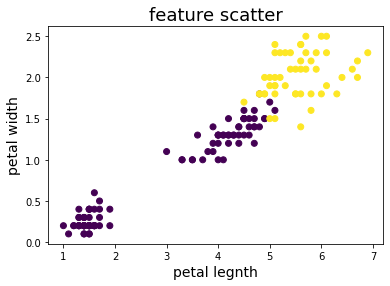

In [3]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("petal legnth", fontsize= 14)
plt.ylabel("petal width", fontsize= 14)
plt.title("feature scatter", fontsize= 18)

In [7]:
# pipeline 생성
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss ="hinge", max_iter = 50000)),
])

In [8]:
# model fitting
svm_clf.fit(X, y)
print(svm_clf.named_steps["linear_svc"].coef_)
print(svm_clf.named_steps["linear_svc"].intercept_)

[[1.63329166 2.38787851]]
[-2.50521715]


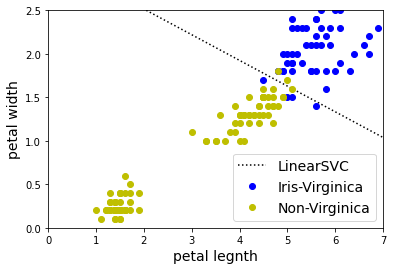

In [13]:
w = -svm_clf.named_steps["linear_svc"].coef_[0, 0]/svm_clf.named_steps["linear_svc"].coef_[0, 1]
b = -svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0, 1]

line = svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5 * w)+b], [5, 5*w+b]])

plt.figure()
plt.plot(line[:, 0], line[:, 1], "k:", label ="LinearSVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label ="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label ="Non-Virginica")

plt.xlabel("petal legnth", fontsize= 14)
plt.ylabel("petal width", fontsize= 14)
plt.legend(loc="lower right", fontsize= 14)
plt.axis([0, 7, 0, 2.5])
plt.show()